# Audio Preprocessing example
[Medium reference](https://towardsdatascience.com/music-genre-classification-with-python-c714d032f0d8)
## Load Audio

In [1]:
import librosa
audio_path = 'genre12/blues/blues.00000.wav'
x, sr  = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(661794,) 22050


In [2]:
# Resample at 44.1 KHz
librosa.load(audio_path, sr = 44100)

(array([ 0.00735559,  0.01335777,  0.01657013, ..., -0.07286715,
        -0.0628456 , -0.03154328], dtype=float32),
 44100)

## Playing Audio 
Using `IPython.display.Audio`

In [3]:
import IPython.display as ipd 
ipd.Audio(audio_path)

## Visualizing Audio
Plot audio array using `librosa.display.waveplot`
### Waveform

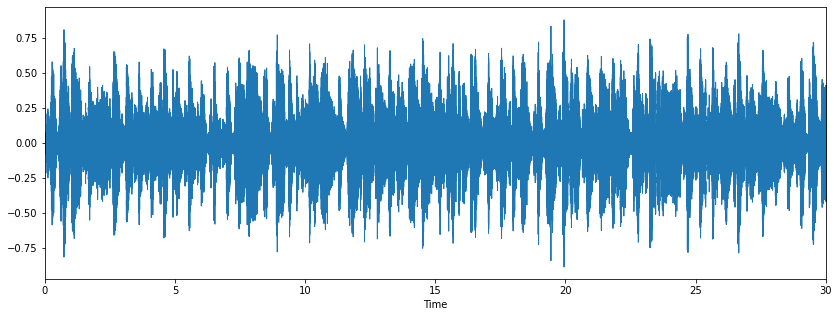

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt 
import librosa.display
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)

### Spectrogram
[WikiLink](https://en.wikipedia.org/wiki/Spectrogram)  
Here we use short-time fourier transform to create Spectrograms

In [5]:
help(librosa.stft)

Help on function stft in module librosa.core.spectrum:

stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann', center=True, dtype=<class 'numpy.complex64'>, pad_mode='reflect')
    Short-time Fourier transform (STFT). [1]_ (chapter 2)
    
    The STFT represents a signal in the time-frequency domain by
    computing discrete Fourier transforms (DFT) over short overlapping
    windows.
    
    This function returns a complex-valued matrix D such that
    
    - `np.abs(D[f, t])` is the magnitude of frequency bin `f`
      at frame `t`, and
    
    - `np.angle(D[f, t])` is the phase of frequency bin `f`
      at frame `t`.
    
    The integers `t` and `f` can be converted to physical units by means
    of the utility functions `frames_to_sample` and `fft_frequencies`.
    
    .. [1] M. Müller. "Fundamentals of Music Processing." Springer, 2015
    
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)], real-valued
        input signal
    
    n_fft : int 

In [6]:
x = librosa.stft(x)
print(x)
print(x.shape)

[[-5.28017139e+00+0.0000000e+00j -3.70380926e+00+0.0000000e+00j
  -2.53658724e+00+0.0000000e+00j ...  3.10940504e+00+0.0000000e+00j
  -4.33118105e-01+0.0000000e+00j -1.74286175e+01+0.0000000e+00j]
 [ 4.27672338e+00+1.0408341e-16j  8.50443125e-01+1.6163833e+00j
   1.28570247e+00-2.8567898e-01j ... -2.20653963e+00+2.1858121e-01j
  -3.14449644e+00-3.2049682e+00j  1.12701941e+01-1.3743819e+01j]
 [-3.94051814e+00-1.4770683e-17j  1.57026231e+00+4.1647038e-01j
  -1.75258324e-01+7.0544934e-01j ... -5.07911384e-01-1.4191605e+00j
  -6.45651579e-01-1.5557450e+00j  2.28059745e+00+1.6550421e+01j]
 ...
 [-8.06762557e-03+4.3623413e-18j  3.98801966e-03-1.9650784e-04j
  -1.77181300e-05+2.0720602e-04j ...  2.41400747e-04-1.1797844e-04j
  -6.74371433e-04+1.6490875e-03j  2.47839396e-03-1.0946114e-02j]
 [ 7.85761513e-03-1.0928758e-16j -9.43385112e-06-3.9045541e-03j
  -6.33000236e-05-1.4332175e-04j ...  1.18047705e-04+1.4816991e-04j
  -7.90521502e-04+8.0170174e-04j  6.89925812e-03+8.4079411e-03j]
 [-7.83765

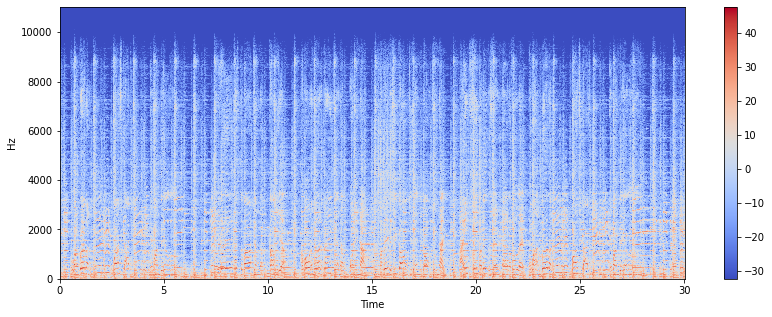

In [7]:
Xdb = librosa.amplitude_to_db(abs(x))
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

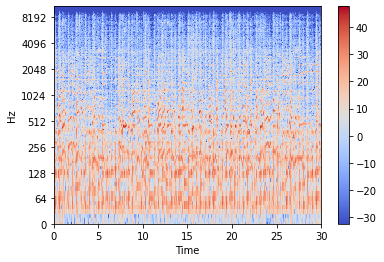

In [8]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Feature extraction
### Zero crossing rate

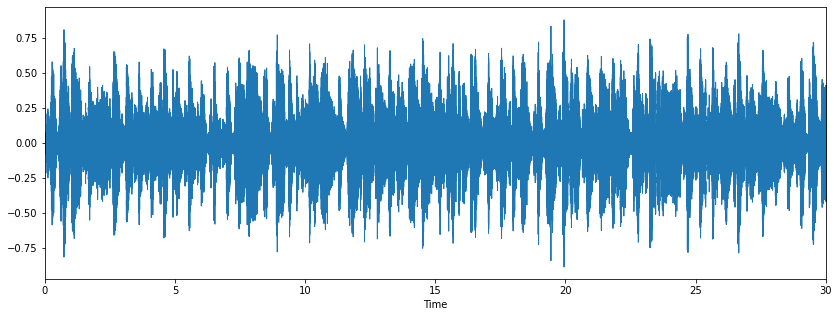

In [9]:
# Load the signal
x, sr = librosa.load(audio_path)
# plot signal
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)

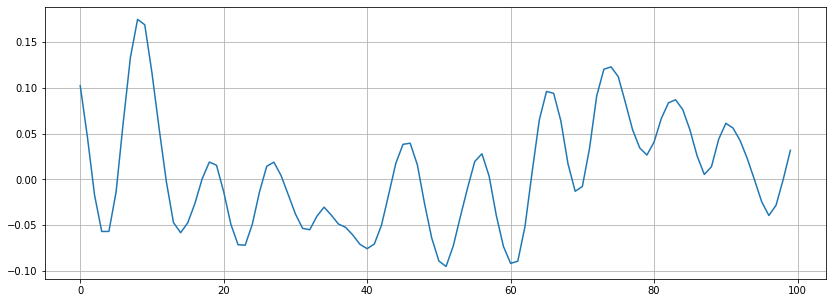

In [10]:
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14,5))
plt.plot(x[n0:n1])
plt.grid()

In [15]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(zero_crossings)
print(sum(zero_crossings))

[False False  True False False False  True False False False False False
  True False False False False  True False False  True False False False
 False False  True False False  True False False False False False False
 False False False False False False False False  True False False False
  True False False False False False False  True False False  True False
 False False False  True False False False False False  True False  True
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False False  True]
16
